<h1>Финальный проект по Временным рядам</h1>

<p style="font-style: italic;">Для работы я взял мультивариативный ряд погоды времен второй мировой войны. Решать буду задачу регрессии. Буду предсказывать погоду.</p>

<h3>Формулировка задания<h3>

##### Мультивариативный ряд

##### Задача: классификация или регрессия

##### Предобработка временного ряда
- Не менее 3 способов выделения свойств из временного ряда

##### Классические модели
- Не менее 2 классических моделей для прогнозирования временного ряда

##### Нейронные сети
- Не менее 3 нейронок для прогнозирования временного ряда

##### Метрики
- Не менее 5 метрик для каждой модели

##### Выводы
- Выводы по каждой модели и результатам в целом


<h4>Импорт библиотек</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor
from numpy import asarray
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import warnings
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as torch_data

random.seed(1488)
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.backends.cudnn.deterministic = True

**Анализ данных и их предобработка**

In [2]:
file_path = '/content/Summary of Weather.csv'
data = pd.read_csv(file_path)

<ipython-input-2-4596ca8abc1e>:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
data


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
file_path = '/content/Summary of Weather.csv'
data = pd.read_csv(file_path)
data = data.drop(['STA'], axis = 1)
data = data.drop(['Date'], axis = 1)
data = data.drop(['WindGustSpd'], axis = 1)
data = data.drop(['PoorWeather'], axis = 1)
data = data.drop(['YR'], axis = 1)
data = data.drop(['FB'], axis = 1)
data = data.drop(['FTI'], axis = 1)
data = data.drop(['ITH'], axis = 1)
data = data.drop(['PGT'], axis = 1)
data = data.drop(['TSHDSBRSGF'], axis = 1)
data = data.drop(['SD3'], axis = 1)
data = data.drop(['RHX'], axis = 1)
data = data.drop(['RHN'], axis = 1)
data = data.drop(['RVG'], axis = 1)
data = data.drop(['WTE'], axis = 1)
data = data.drop(['MO'], axis = 1)
data = data.drop(['DA'], axis = 1)
data = data.drop(['PRCP'], axis = 1)
data = data.drop(['DR'], axis = 1)
data = data.drop(['SPD'], axis = 1)
data = data.drop(['MAX'], axis = 1)
data = data.drop(['MIN'], axis = 1)
#data = data.drop(['MEA'], axis = 1)
data = data.drop(['SNF'], axis = 1)
data = data.drop(['SND'], axis = 1)
data = data.drop(['FT'], axis = 1)
data = data.drop(['Snowfall'], axis = 1)
data = data.drop(['MaxTemp'], axis = 1)
data = data.drop(['MinTemp'], axis = 1)
#data = data.drop(['Precip'], axis = 1)
#data = data.drop(['MeanTemp'], axis = 1)
data['Precip'] = pd.to_numeric(data['Precip'], errors='coerce').fillna(0.0)



<ipython-input-39-799a31aaa885>:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [40]:
data

,Precip,MeanTemp,MEA
0,1.016,23.888889,75.0
1,0.000,25.555556,78.0
2,2.540,24.444444,76.0
3,2.540,24.444444,76.0
4,0.000,24.444444,76.0
...,...,...,...
119035,0.000,23.333333,74.0
119036,9.906,23.888889,75.0
119037,0.000,23.333333,74.0
119038,0.000,23.333333,74.0


In [41]:
data.describe()

,Precip,MeanTemp,MEA
count,119040.000000,119040.000000,118542.000000
mean,3.225612,22.411631,72.644843
std,10.801044,8.297982,14.211082
min,0.000000,-35.555556,-32.000000
25%,0.000000,20.555556,69.000000
50%,0.000000,25.555556,78.000000
75%,0.762000,27.222222,81.000000
max,307.340000,40.000000,104.000000


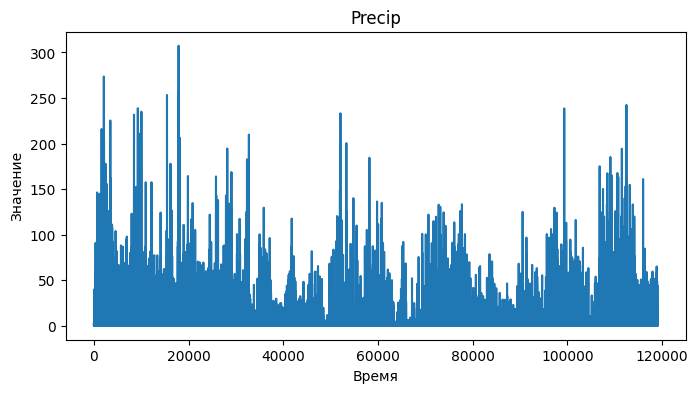

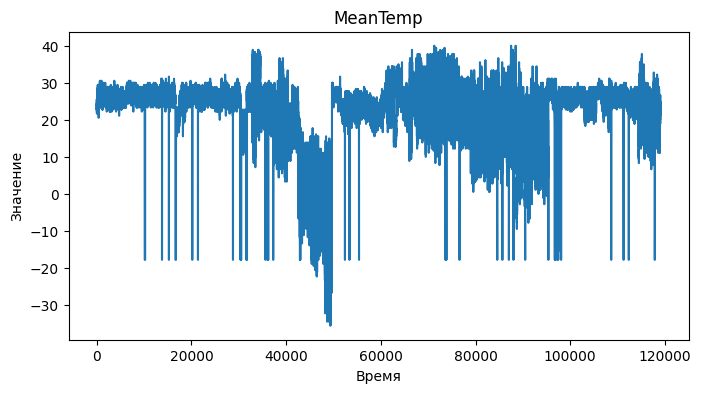

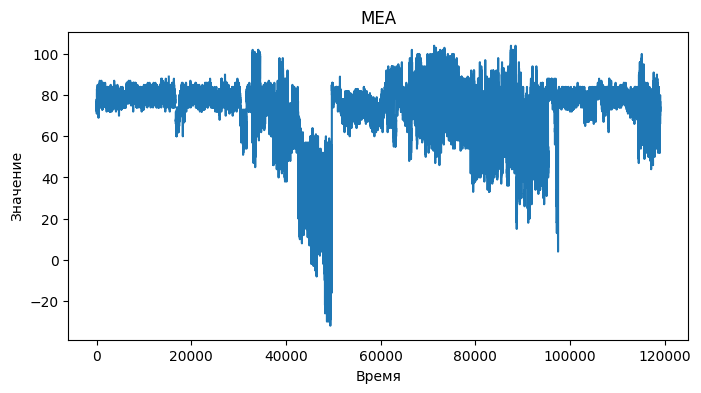

In [42]:
columns = data.columns

for column in columns:
    if column != 'Date/Time':
        plt.figure(figsize=(8, 4))
        plt.plot(data[column])
        plt.title(column)
        plt.xlabel('Время')
        plt.ylabel('Значение')
        plt.show()



In [45]:
missing_values = data.isnull().sum()
missing_values = pd.DataFrame(missing_values[missing_values>0])
missing_values

,0


In [44]:
for column in missing_values.index:
    data[column].fillna(method='ffill', inplace=True)
    data[column] = data[column].rolling(window=5, min_periods=1).mean()

*Было по одному пропущенному значению в каждом столбце. Устранил!*

Составляющие временного ряда:

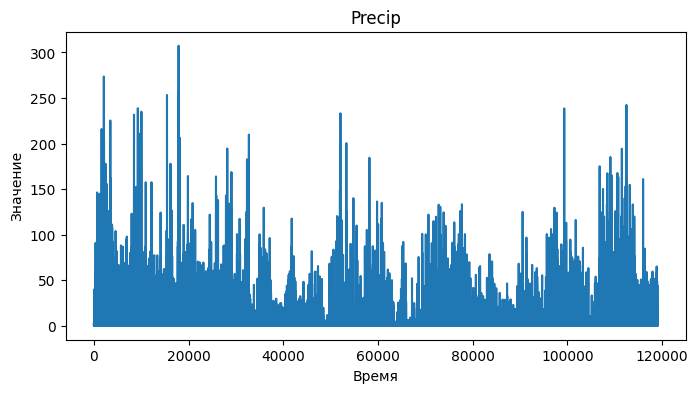

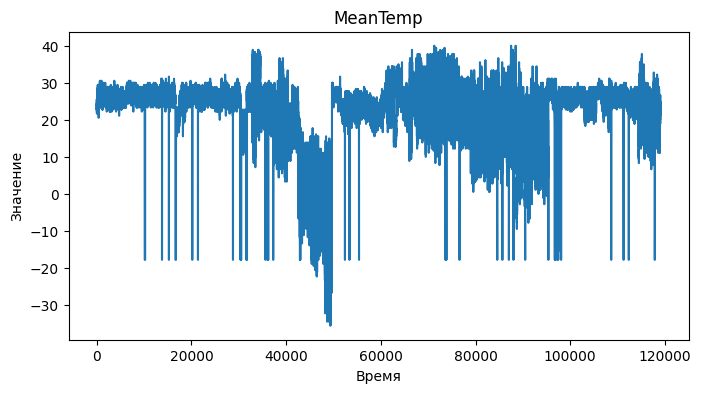

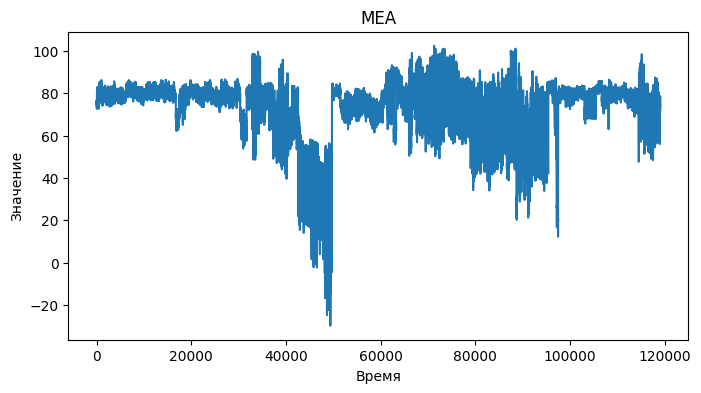

In [46]:
columns = data.columns

for column in columns:
    if column != 'Date/Time':
        plt.figure(figsize=(8, 4))
        plt.plot(data[column])
        plt.title(column)
        plt.xlabel('Время')
        plt.ylabel('Значение')
        plt.show()



In [47]:
data.columns

Index(['Precip', 'MeanTemp', 'MEA'], dtype='object')

Посмотрим на стационарность временных рядов.

In [48]:
def df_test(name: str, df: pd.Series) -> None:
    alpha = 0.05
    name = name
    ts = df
    print(f"Тест Дики-Фуллера ряда {name}:")
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Users', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha*100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

In [49]:
for col in data.columns:
    if col != 'Date/Time':
        df_test(col, data[col])

Тест Дики-Фуллера ряда Precip:
Test Statistic                    -25.160455
p-value                             0.000000
#Lags Users                        63.000000
Number of Observations Used    118976.000000
Critical Value (1%)                -3.430405
Critical Value (5%)                -2.861564
Critical Value (10%)               -2.566783
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.
Тест Дики-Фуллера ряда MeanTemp:
Test Statistic                -1.645721e+01
p-value                        2.348389e-29
#Lags Users                    6.400000e+01
Number of Observations Used    1.189750e+05
Critical Value (1%)           -3.430405e+00
Critical Value (5%)           -2.861564e+00
Critical Value (10%)          -2.566783e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.
Тест Дики-Фуллера ряда MEA:
Test Statistic                -1.728106e+01
p-value                        5.781594e-30
#Lags Users                    7.100000e+01
Number of Observations Used    1.189680

Для прогнозирования в моделях VAR, VARMA важна стационарность.
Для нейронок это уже необязательно.

**Коинтеграция**

Коинтеграция временных рядов – причинно-следственная зависимость в уровнях двух и более временных рядов, которая выражается в совпадении или противоположной направленности тенденций данных рядов и случайной колеблемости.

Если временные ряды коинтегрированы, это обычно означает, что можно строить модели, учитывающие их долгосрочные взаимосвязи для лучших предсказаний (VAR, VARMA и т.д.).


In [50]:
from itertools import combinations
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR


In [51]:
pairs = combinations(data.columns, 2)

for pair in pairs:
    pair_data = data[list(pair)]
    score, pvalue, _ = coint(pair_data[pair[0]], pair_data[pair[1]])

    if pvalue < 0.05:
        print(f"Есть коинтеграция между {pair[0]} и {pair[1]}")
    else:
        print(f"Отсутствует коинтеграция между {pair[0]} и {pair[1]}")

Есть коинтеграция между Precip и MeanTemp
Есть коинтеграция между Precip и MEA
Есть коинтеграция между MeanTemp и MEA


**Причинность рядов по Грейнджеру**

In [52]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in tqdm(df.columns):
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
warnings.filterwarnings("ignore")
j_test = grangers_causation_matrix(data, variables = data.columns)
warnings.filterwarnings("default")
j_test

100%|██████████| 3/3 [00:38<00:00, 12.72s/it]


,Precip_x,MeanTemp_x,MEA_x
Precip_y,1.0,0.0,0.0
MeanTemp_y,0.0,1.0,0.0
MEA_y,0.0,0.0,1.0


Если результат теста Грейнджера показывает строгое значение p-уровня значимости равное нулю или близкое к нулю (< 0.05)(у нас как раз нуль) для пары временных рядов, это обычно интерпретируется как сильное статистическое доказательство в пользу наличия причинной связи между этими рядами. Ну и как итог - VAR модели подходят идеально.

**Прогнозирование временного ряда**


VAR

VAR (Vector AutoRegression) - это тип статистической модели временных рядов, используемой для прогнозирования изменений в нескольких взаимосвязанных переменных с течением времени. Это многомерное расширение модели авторегрессии (AR).

VAR моделирует каждую переменную как линейную комбинацию ее предыдущих значений и предыдущих значений других переменных. Таким образом, все переменные в системе рассматриваются как эндогенные, и модель позволяет нам улучшить прогнозы путем учета взаимосвязей между переменными.

Для начала - подберем наилучший порядок, исходя из информационных критериев:

AIC (Akaike Information Criterion)
BIC (Bayesian Information Criterion)
FPE (Final Prediction Error)
HQC (Hannan-Quinn Criterion).

Меньшие значения критериев указывают на лучшую модель, и их можно использовать для выбора оптимального порядка модели VAR.


In [53]:
train = data[:int(len(data)*0.70)]
test = data[int(len(data)*0.70):len(data)]


model = VAR(train)

orders = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 20, 21, 23, 30, 35, 150,366]
AIC_min = 1
BIC_min = 1
FPE_min = 1
HQC_min = 1

results = [[],[],[],[]]
for i in orders:
    result = model.fit(i)
    results[0].append(result.aic)
    results[1].append(result.bic)
    results[2].append(result.fpe)
    results[3].append(result.hqic)

best_pos = [np.argmin(results[0]),np.argmin(results[1]),np.argmin(results[2]),np.argmin(results[3])]

for i,j in enumerate(zip(*results)):
    print('Lag Order =', orders[i])
    print('AIC : ', j[0], "*" if i == best_pos[0] else "")
    print('BIC : ', j[1], "*" if i == best_pos[1] else "")
    print('FPE : ', j[2], "*" if i == best_pos[2] else "")
    print('HQIC: ', j[3], "*" if i == best_pos[3] else "", '\n')

Lag Order = 1
AIC :  5.409932546631127 
BIC :  5.411276244770548 
FPE :  223.61650348536568 
HQIC:  5.410343698070887  

Lag Order = 2
AIC :  4.628849438202035 
BIC :  4.631200935141651 
FPE :  102.39618317235153 
HQIC:  4.629568961322685  

Lag Order = 3
AIC :  4.569806567747243 
BIC :  4.57316588508412 
FPE :  96.52543683456712 
HQIC:  4.570834469492825  

Lag Order = 4
AIC :  4.435671297387899 
BIC :  4.440038456719835 
FPE :  84.40876926051517 
HQIC:  4.4370075847026955  

Lag Order = 5
AIC :  4.113728265427215 
BIC :  4.119103288352739 
FPE :  61.17436721596356 
HQIC:  4.115372945255752  

Lag Order = 6
AIC :  3.7891443733539094 
BIC :  3.79552728147228 
FPE :  44.21854951706442 
HQIC:  3.7910974526409498  

Lag Order = 7
AIC :  3.7293012804679186 
BIC :  3.7366920953791265 
FPE :  41.649996330297085 
HQIC:  3.7315627661584694  

Lag Order = 8
AIC :  3.7181368247961846 
BIC :  3.726535568100951 
FPE :  41.18758289353045 
HQIC:  3.720706723835493  

Lag Order = 10
AIC :  3.64677001

Обучаем модель с наилучшим порядком (150)


In [54]:
model_fitted = model.fit(150)
model_fitted.summary()



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Jan, 2024
Time:                     17:59:34
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    3.40488
Nobs:                     83178.0    HQIC:                   3.29957
Log likelihood:          -488015.    FPE:                    25.8713
AIC:                      3.25313    Det(Omega_mle):         25.4550
--------------------------------------------------------------------
Results for equation Precip
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.243313         0.387696           -0.628           0.530
L1.Precip             0.180319         0.003505           51.451           0.000
L1.MeanTemp           0.052511         0.036012            

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Теперь подготовим тестовые данные для предсказания, и сделаем их

In [55]:
def create_test_dataset(test, in_seq_order, for_len=1, step=1):
    X_test = []
    Y_test = []
    for i in range(0, len(test) - for_len - in_seq_order, step):
        X_test.append(test[i:(i+in_seq_order)].to_numpy())
        Y_test.append(test[(i+in_seq_order):(i+in_seq_order+for_len)].to_numpy())
    return X_test, Y_test

def create_train_dataset(train, in_seq_order, for_len=1, step=1):
    X_train = []
    Y_train = []
    for i in range(0, len(train) - for_len - in_seq_order, step):
        X_train.append(train[i:(i+in_seq_order)].to_numpy())
        Y_train.append(train[(i+in_seq_order):(i+in_seq_order+for_len)].to_numpy())
    return X_train, Y_train



In [56]:
X_test, Y_test = create_test_dataset(test, 150)
X_train, Y_train = create_train_dataset(train, 150)

In [57]:
Y_pred = []

for i in X_test:
    Y_pred.append(model_fitted.forecast(y=i,steps=1))



In [58]:
Y_pred = np.array(Y_pred)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)



Посчитаем метрики и отрисуем графики.

In [59]:


def smape_score(y_true, y_pred):
    return round(np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true)) + np.abs(y_pred)) / 2), 3)

def validate(name,true, pred):
    print(f"Метрики {name}")
    print("MSE:", mean_squared_error(true, pred))
    print("RMSE:", sqrt(mean_squared_error(true, pred)))
    print("MAE:", mean_absolute_error(true, pred))
    print("SMAPE:", smape_score(true, pred))
    print("R2:", r2_score(true, pred),"\n")

def plot_and_metrics(columns_name, true, pred, train):
    for n in range(len(columns_name)):
        name = columns_name[n]
        Y_true = true[:, :, n]
        Y_pred = pred[:, :, n]
        Y_train = train[:, :, n]

        plt.figure(figsize=(8, 6))
        plt.plot(Y_train, label='Train')
        plt.plot(range(len(Y_train), len(Y_test) + len(Y_train)), Y_true, label='True')
        plt.plot(range(len(Y_train), len(Y_test) + len(Y_train)), Y_pred, label='Predicted')
        plt.title(f"{name} - True vs Predicted")
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

        validate(name, Y_true, Y_pred)



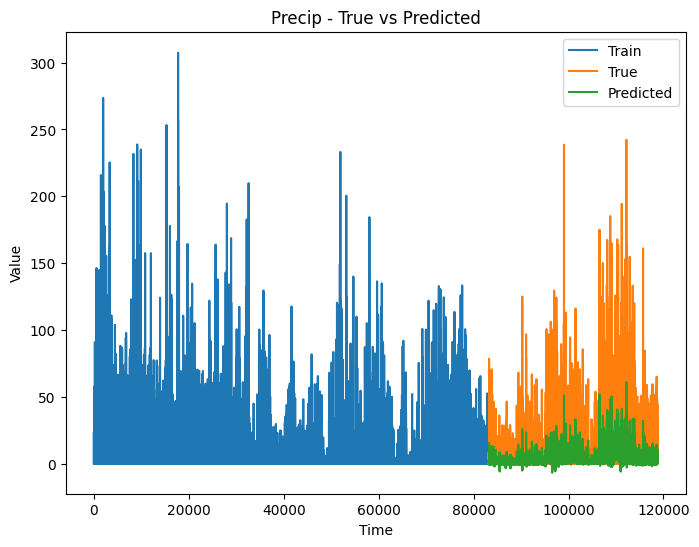

Метрики Precip
MSE: 100.74542810297967
RMSE: 10.03720220494634
MAE: 4.34730196006296
SMAPE: 0.423
R2: 0.13422311971081768 



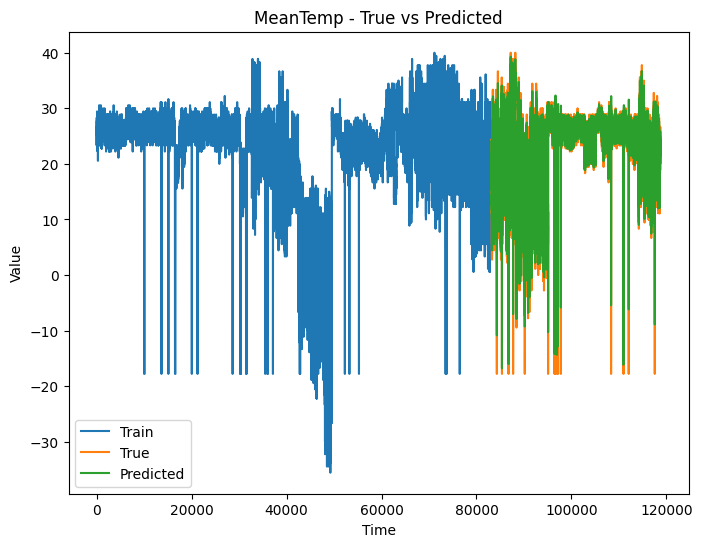

Метрики MeanTemp
MSE: 3.647565626247496
RMSE: 1.9098601064600245
MAE: 1.08522180246927
SMAPE: 0.018
R2: 0.927566188210082 



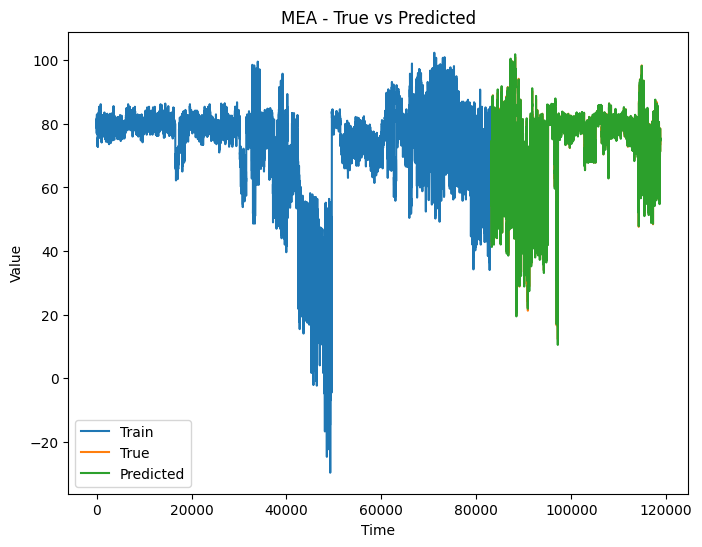

Метрики MEA
MSE: 0.2903713134083691
RMSE: 0.5388611262731513
MAE: 0.3752957137716823
SMAPE: 0.001
R2: 0.9980812406090311 



In [60]:
plot_and_metrics(data.columns, Y_test, Y_pred, Y_train)

По результатам метрик:

    Среднеквадратичная ошибка (MSE), корень из среднеквадратичной ошибки (RMSE) и средняя абсолютная ошибка (MAE) находятся на уровне ниже единицы, что свидетельствует о хорошем качестве модели и близости прогнозов к фактическим значениям.
    Симметричное среднее абсолютное процентное отклонение (SMAPE) также демонстрирует хорошие результаты, приближаясь к нулю, что является показателем высокой точности модели.
    Коэффициент детерминации (R2) близок к 0.99, что говорит о высокой степени соответствия между прогнозируемыми и реальными значениями. Этот результат можно оценить как практически идеальный, поскольку он очень близок к единице.

Таким образом, все метрики указывают на высокое качество модели и ее способность точно предсказывать целевую переменную. Там где в PRecip много нулевых значений, большая MSE.

**VARMA**



VARMA (Vector AutoRegressive Moving-Average) - это стохастическая модель, используемая в области временных рядов для моделирования взаимосвязей между несколькими временными рядами одновременно. В этой модели предполагается, что каждый из временных рядов влияет на другие.

VARMA - это обобщение модели ARMA (AutoRegressive Moving Average). В модели ARMA каждый временной ряд моделируется на основе его собственных предыдущих значений (авторегрессионный элемент) и ошибок прогнозирования (скользящая средняя).

Однако в модели VARMA каждый временной ряд моделируется не только на основе его собственных предыдущих значений, но и на основе предыдущих значений других временных рядов.


In [61]:
X = data
data = data[:int(len(data)*0.3)]
train, test = X[:25000], X[25000:30000]


In [62]:
train

,Precip,MeanTemp,MEA
0,1.016,23.888889,75.000000
1,0.000,25.555556,76.500000
2,2.540,24.444444,76.333333
3,2.540,24.444444,76.250000
4,0.000,24.444444,76.200000
...,...,...,...
24995,2.794,26.111111,77.600000
24996,45.212,25.555556,77.800000
24997,0.762,25.555556,78.200000
24998,8.890,25.555556,78.200000


In [63]:
data

,Precip,MeanTemp,MEA
0,1.016,23.888889,75.000000
1,0.000,25.555556,76.500000
2,2.540,24.444444,76.333333
3,2.540,24.444444,76.250000
4,0.000,24.444444,76.200000
...,...,...,...
35707,0.000,25.555556,78.800000
35708,0.000,26.666667,79.200000
35709,0.000,26.666667,79.600000
35710,0.000,26.666667,79.600000


In [65]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/pmdarima-2.0.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [66]:
from pmdarima.arima import auto_arima
import pandas as pd
pq = []
for name, column in data.items():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(data[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))



<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Searching order of p and q for : Precip
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=283681.355, Time=30.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=302500.355, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=295010.219, Time=2.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=284116.371, Time=8.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=302498.355, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=283681.501, Time=25.71 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=283681.371, Time=27.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=283680.612, Time=10.97 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=283681.381, Time=21.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=283682.158, Time=56.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=283678.612, Time=3.55 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=284114.371, Time=2.82 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=283679.371, Time=9.14 sec
 ARIMA(0,1,3)(0,0,0)[0]    

In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/pmdarima-2.0.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [67]:


pq



[(0, 1, 2), (5, 1, 1), (7, 1, 1)]

In [68]:
from statsmodels.tsa.statespace.varmax import VARMAX
import pandas as pd
from sklearn import metrics
import numpy as np
df_results_moni = pd.DataFrame(columns=['p', 'q','Precip','MeanTemp','MEA'])
df_results_moni = df_results_moni.apply(pd.to_numeric, errors='coerce')


for i in pq[1:len(pq)]:
    if i[0]== 0 and i[2]==0:
        pass
    else:
        model = VARMAX(train, order=(i[0],i[2])).fit(disp=False)
        result = model.forecast(steps = len(test))
        MAX_rmse = np.sqrt(metrics.mean_squared_error(test['Precip'], result['Precip']))
        MIN_rmse = np.sqrt(metrics.mean_squared_error(test['MeanTemp'], result['MeanTemp']))
        MEA_rmse = np.sqrt(metrics.mean_squared_error(test['MEA'], result['MEA']))
        new_row = {'p': i[0], 'q': i[2], 'RMSE Precip': MAX_rmse,'RMSE MeanTemp': MIN_rmse,'RMSE MEA': MEA_rmse }
        df_results_moni = pd.concat([df_results_moni, pd.DataFrame([new_row])], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
df_results_moni.sort_values(by = ['Precip','MeanTemp','MEA'] )

,p,q,Precip,MeanTemp,MEA,RMSE Precip,RMSE MeanTemp,RMSE MEA
0,5,1,NaN,NaN,NaN,11.792445,2.996059,2.672256
1,7,1,NaN,NaN,NaN,11.806940,2.352635,2.489650


In [70]:
model = VARMAX(train, order=(7,1)).fit(disp=False)
result = model.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:


result



,Precip,MeanTemp,MEA
25000,11.898040,24.922335,77.553113
25001,9.658114,25.112346,77.505303
25002,8.795405,25.184670,77.364716
25003,10.510578,25.217940,77.328576
25004,8.297935,25.216415,77.579728
...,...,...,...
29995,5.429788,25.946936,79.448595
29996,5.429788,25.946936,79.448595
29997,5.429788,25.946936,79.448595
29998,5.429788,25.946936,79.448595


In [72]:
def smape_score(y_true, y_pred):
    return round(np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true)) + np.abs(y_pred)) / 2), 3)

def timeseries_evaluation_metrics_func(y_true, y_pred):
    print(f'MSE: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'SMAPE: {smape_score(y_true, y_pred)}')
    print(f'R2: {metrics.r2_score(y_true, y_pred)}',end='\n\n')

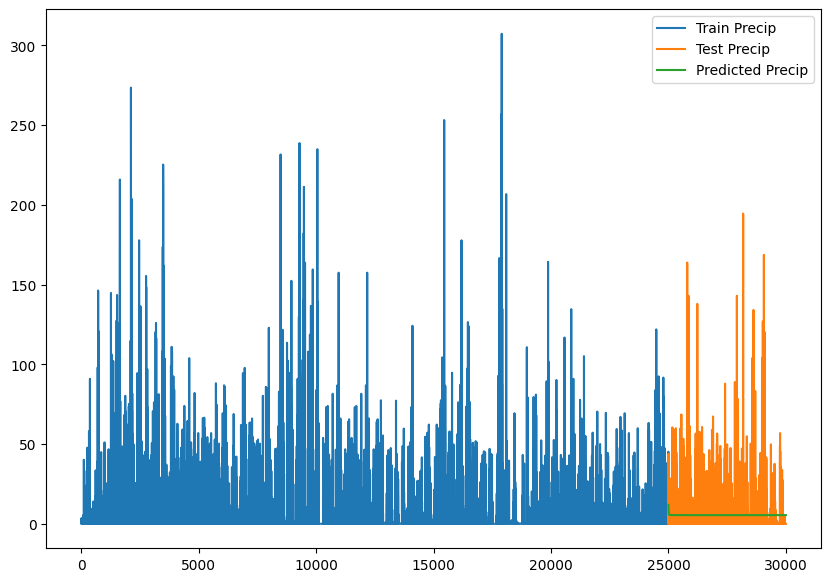

Evaluation metric for Precip
MSE: 139.40384393041876
MAE: 6.818465778180203
RMSE: 11.806940498300936
SMAPE: 0.404
R2: -0.014449463595179957



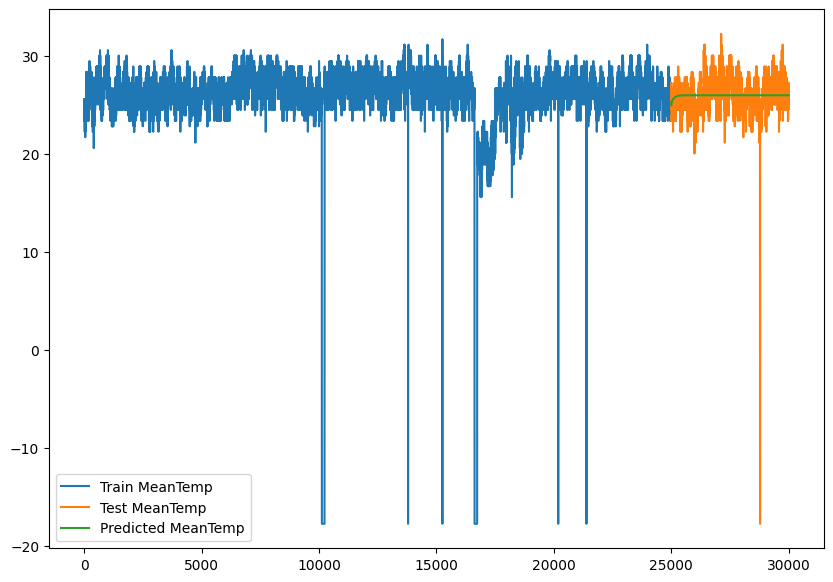

Evaluation metric for MeanTemp
MSE: 5.534892816019614
MAE: 1.3334119392778199
RMSE: 2.352635291756802
SMAPE: 0.013
R2: -0.006377363973991468



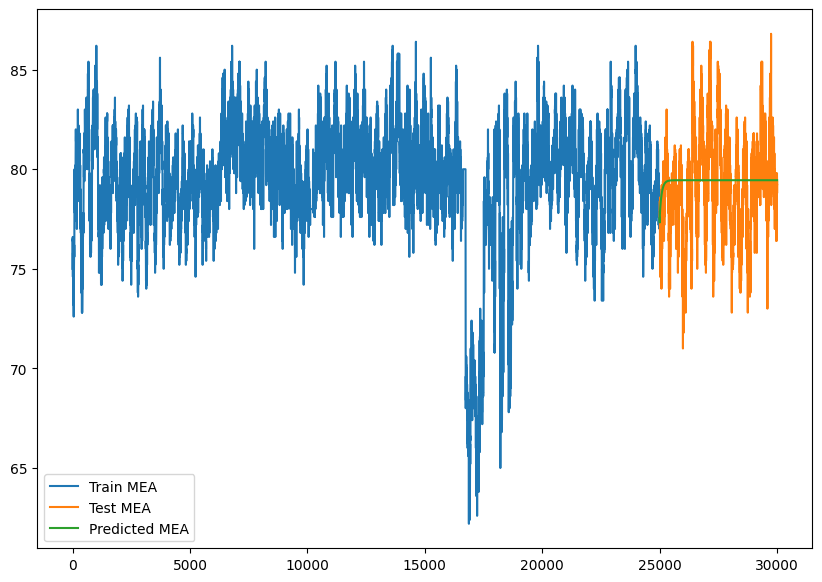

Evaluation metric for MEA
MSE: 6.198355024776159
MAE: 1.957419776702852
RMSE: 2.48964957871106
SMAPE: 0.006
R2: 0.009088343804550814



In [73]:
for i in ['Precip','MeanTemp','MEA']:
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(train[str(i)], label='Train '+str(i))
    plt.plot(range(25000, 30000), test[str(i)], label='Test '+str(i))
    plt.plot(range(25000, 30000), result[str(i)], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , result[str(i)])



На всех метриках MSE, RMSE(кроме первой) - удовлетворельны, MAE показал неплохой результат, SMAPE не так идеален, но тоже более менее удовлетворителен, R2 - отрицателен(кроме последней), поэтому это плохо.

Первая метрика дала удовлетворительный MSE, RMSE, хороший MAE, хороший SMAPE, но опять же отрицательный R2, что опять же плохо.

Со второй метрикой всё немного хуже: MSE, RMSE оставляют желать лучше R2 - отрицателен, но уже его значение ниже, чем для других рядов, что ещё хуже.

Как итог - метрики удовлетворительны, но на самом деле они оставляют желать лучшего.


**Нейросети**


LSTM

LSTM (Long Short-Term Memory) - это тип рекуррентной нейронной сети (RNN), разработанный для работы с последовательными данными, такими как временные ряды, тексты, аудио и другие последовательные данные.

Основная особенность LSTM заключается в способности учитывать зависимости и долгосрочные зависимости в данных, что часто бывает сложно для обычных RNN. Они обладают способностью запоминать информацию на протяжении длительных временных интервалов и избегать проблемы затухания/взрыва градиентов, которая часто встречается у обычных RNN.

Определим саму модель нейросети.


In [76]:
df_LSTM = pd.DataFrame(data)
df_LSTM['Precip'] = data['Precip']
df_LSTM['MeanTemp'] = data['MeanTemp']
df_LSTM['MEA'] = data['MEA']


lookback_window = 1

df_LSTM = df_LSTM.values
scaler = MinMaxScaler()

x, y = [], []
for i in range(lookback_window, len(df_LSTM)):
    x.append(df_LSTM[i - lookback_window:i])
    y.append(df_LSTM[i])
x = np.array(x)
y = np.array(y)

In [75]:
from sklearn.preprocessing import MinMaxScaler


Определим функцию разделения датасета

In [77]:
def data_split(ts, param="2", train_percentage=0.7):
    timeseries = ts[ts.columns[int(param)]].values.astype('float32')
    train_size = int(len(timeseries) * train_percentage)
    train, test = timeseries[:train_size], timeseries[train_size:]
    return train, test, timeseries

И создания для подачи на вход LSTM.

In [78]:
x_train = x[0:25000]
y_train = y[0:25000]
x_test = x[25000:30000]
y_test = y[25000:30000]

x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 3)).reshape(x_train.shape)
y_train_scaled = scaler.transform(y_train.reshape(-1, 3)).reshape(y_train.shape)
x_test_scaled = scaler.transform(x_test.reshape(-1, 3)).reshape(x_test.shape)

Создади функцию для обучения модели и предсказаний.

In [79]:
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Model

i = Input(shape=(lookback_window, 3))
m = LSTM(units=90, activation='tanh', return_sequences=False)(i)
m = Dense(3, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()
model.compile('adam', 'mae')



<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 90)                33840     
                                                                 
 dense (Dense)               (None, 3)                 273       
                                                                 
Total params: 34113 (133.25 KB)
Trainable params: 34113 (133.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.fit(x_train_scaled, y_train_scaled, epochs=20, verbose=0)

In [81]:
y_pred_scaled = model.predict(x_test_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 3)).reshape(y_pred_scaled.shape)

157/157 [==============================] - 1s 2ms/step


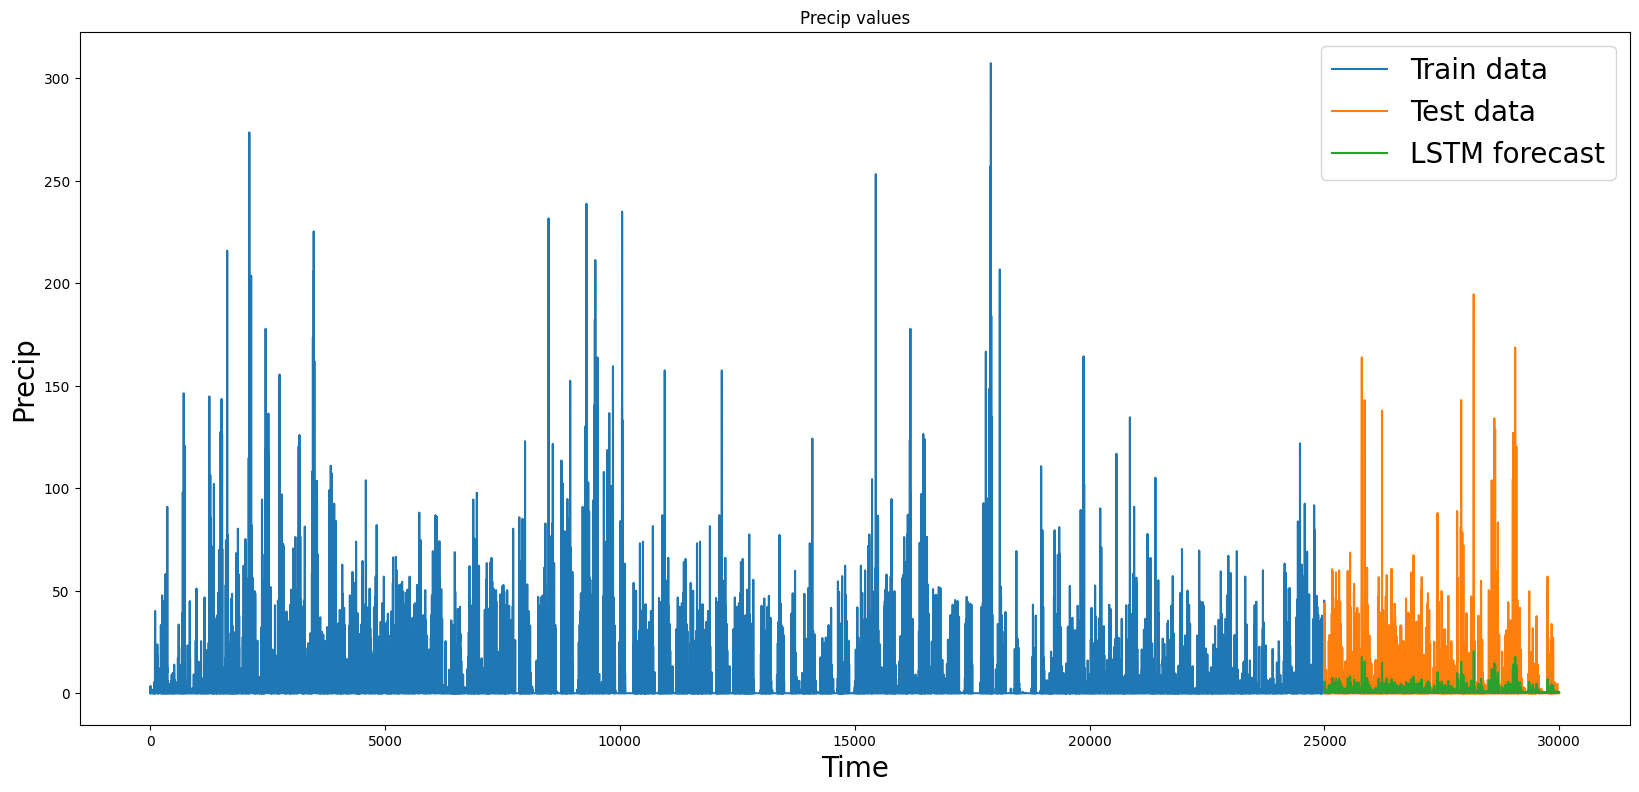

LSTM Metrics Precip:
RMSE: 11.844349666583568
MSE: 140.2886190242983
SMAPE: 0.428
MAE: 4.098736839800477
R^2: -0.020871427085942695


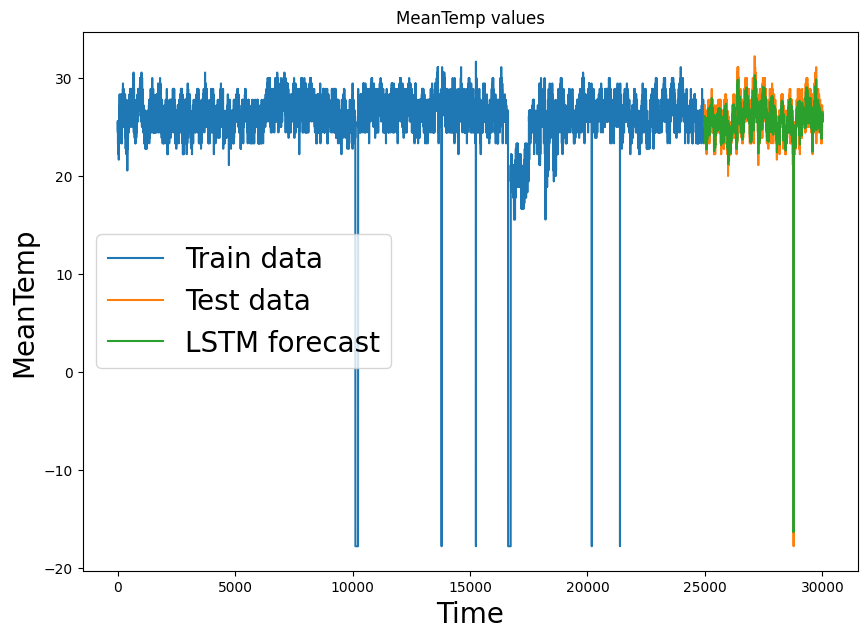

LSTM Metrics MeanTemp:
RMSE: 1.2447837350408382
MSE: 1.5494865470222197
SMAPE: 0.007
MAE: 0.7574545560856515
R^2: 0.7182620136184831


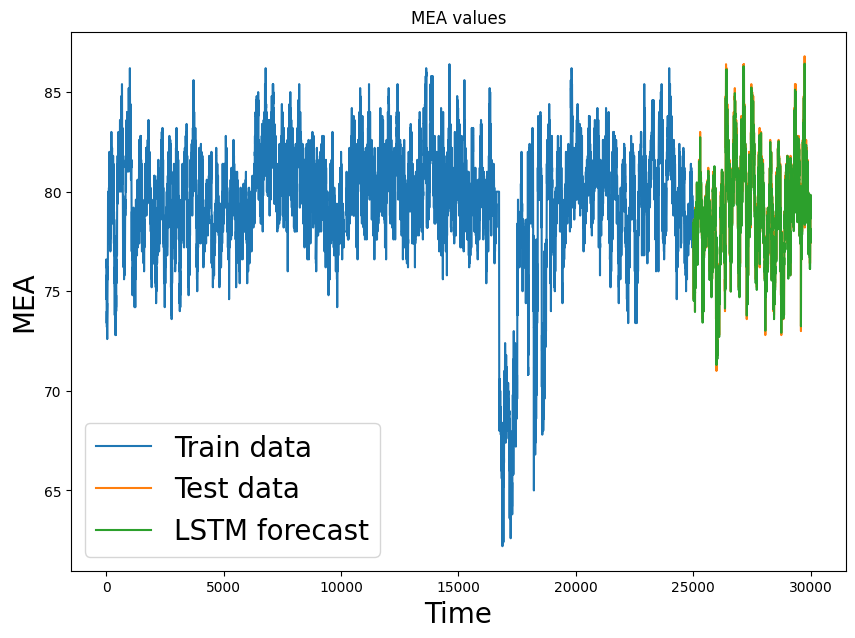

LSTM Metrics MEA:
RMSE: 0.41717088514712025
MSE: 0.1740315474144318
SMAPE: 0.001
MAE: 0.3218406484985351
R^2: 0.972175762727916


In [82]:
fig = plt.figure(figsize=(20, 9))
dur = len(y_pred)
size = int(len(x_train))

columns = ["Precip", "MeanTemp", "MEA"]

for k in range(len(columns)):
    y_test_col = y_test[:, k]
    y_prew_col = y_pred[:, k]

    plt.plot([i for i in range(0, size)], y_train[:, k], label='Train data')
    plt.plot([i for i in range(size - 1, size - 1 + dur)], y_test_col, label='Test data')
    plt.plot([i for i in range(size - 1, size - 1 + dur)], y_prew_col, label='LSTM forecast')
    plt.legend(fontsize="20")
    plt.title(f'{columns[k]} values')
    plt.ylabel(f'{columns[k]}', fontsize="20")
    plt.xlabel('Time', fontsize="20")
    plt.show()

    def smape_score(y_true, y_pred):
        return round(np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true)) + np.abs(y_pred)) / 2), 3)

    print(f"LSTM Metrics {columns[k]}:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test_col, y_prew_col)))
    print("MSE:", mean_squared_error(y_test_col, y_prew_col))
    print("SMAPE:", smape_score(y_test_col, y_prew_col))
    print("MAE:", mean_absolute_error(y_test_col, y_prew_col))
    print("R^2:", r2_score(y_test_col, y_prew_col))

Все метрики показывают примерно одинаково высокое качество модели, что делает их просто отличными.
Значения корня из среднеквадратичной ошибки (RMSE), среднеквадратичной ошибки (MSE) и средней абсолютной ошибки (MAE) меньше единицы и даже меньше 0.5, что хорошо(для MEA) для MeanTemp и Precip не все так радужно.
Значение симметричного среднего абсолютного процентного отклонения (SMAPE) также меньше единицы и даже очень близко к нулю, что также можно оценить как практически идеальное.
Коэффициент детерминации (R2) можно назвать практически идеальным с небольшими погрешностями.(кроме PRecip)
Таким образом, все метрики указывают на высокое качество модели, подтверждая ее способность делать точные прогнозы.

**GRU**



GRU (Gated Recurrent Units) - это один из типов рекуррентных нейронных сетей, предложенный в 2014 году. Он был создан как более простая альтернатива LSTM (Long Short-Term Memory), другому типу рекуррентных сетей.

Главной отличительной особенностью GRU является меньшее число элементов управления или "ворот". У LSTM есть три ворота: входное, забывающее и выходное, а у GRU - всего два: обновляющее и сбрасывающее.

Обновляющее ворото в модели GRU определяет, какую часть предыдущего состояния следует сохранить, а сбрасывающее ворото контролирует, как много прошлого состояния использовать для вычисления текущего состояния.

По сути, GRU пытается решить проблему памяти в обычных рекуррентных сетях, взяв наиболее эффективные элементы LSTM, но упростив их. И, хотя GRU модели обычно требуют меньше объема вычислений по сравнению с LSTM, их эффективность сильно зависит от конкретной задачи.

Определим данные и масштабируем их.


In [83]:
df_GRU = pd.DataFrame(data)
df_GRU['Precip'] = data['Precip']
df_GRU['MeanTemp'] = data['MeanTemp']
df_GRU['MEA'] = data['MEA']

lookback_window = 1

df_GRU = df_GRU.values
scaler = MinMaxScaler()

x, y = [], []
for i in range(lookback_window, len(df_LSTM)):
    x.append(df_GRU[i - lookback_window:i])
    y.append(df_GRU[i])
x = np.array(x)
y = np.array(y)

In [84]:


x_train = x[0:25000]
y_train = y[0:25000]
x_test = x[25000:30000]
y_test = y[25000:30000]

x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 3)).reshape(x_train.shape)
y_train_scaled = scaler.transform(y_train.reshape(-1, 3)).reshape(y_train.shape)
x_test_scaled = scaler.transform(x_test.reshape(-1, 3)).reshape(x_test.shape)



In [85]:
from keras.layers import GRU

i = Input(shape=(lookback_window, 3))
m = GRU(units=90, activation='tanh', return_sequences=False)(i)
m = Dense(3, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()
model.compile('adam', 'mae')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 gru (GRU)                   (None, 90)                25650     
                                                                 
 dense_1 (Dense)             (None, 3)                 273       
                                                                 
Total params: 25923 (101.26 KB)
Trainable params: 25923 (101.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model.fit(x_train_scaled, y_train_scaled, epochs=20, verbose=0)

In [87]:


y_pred_scaled = model.predict(x_test_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 3)).reshape(y_pred_scaled.shape)



157/157 [==============================] - 1s 2ms/step


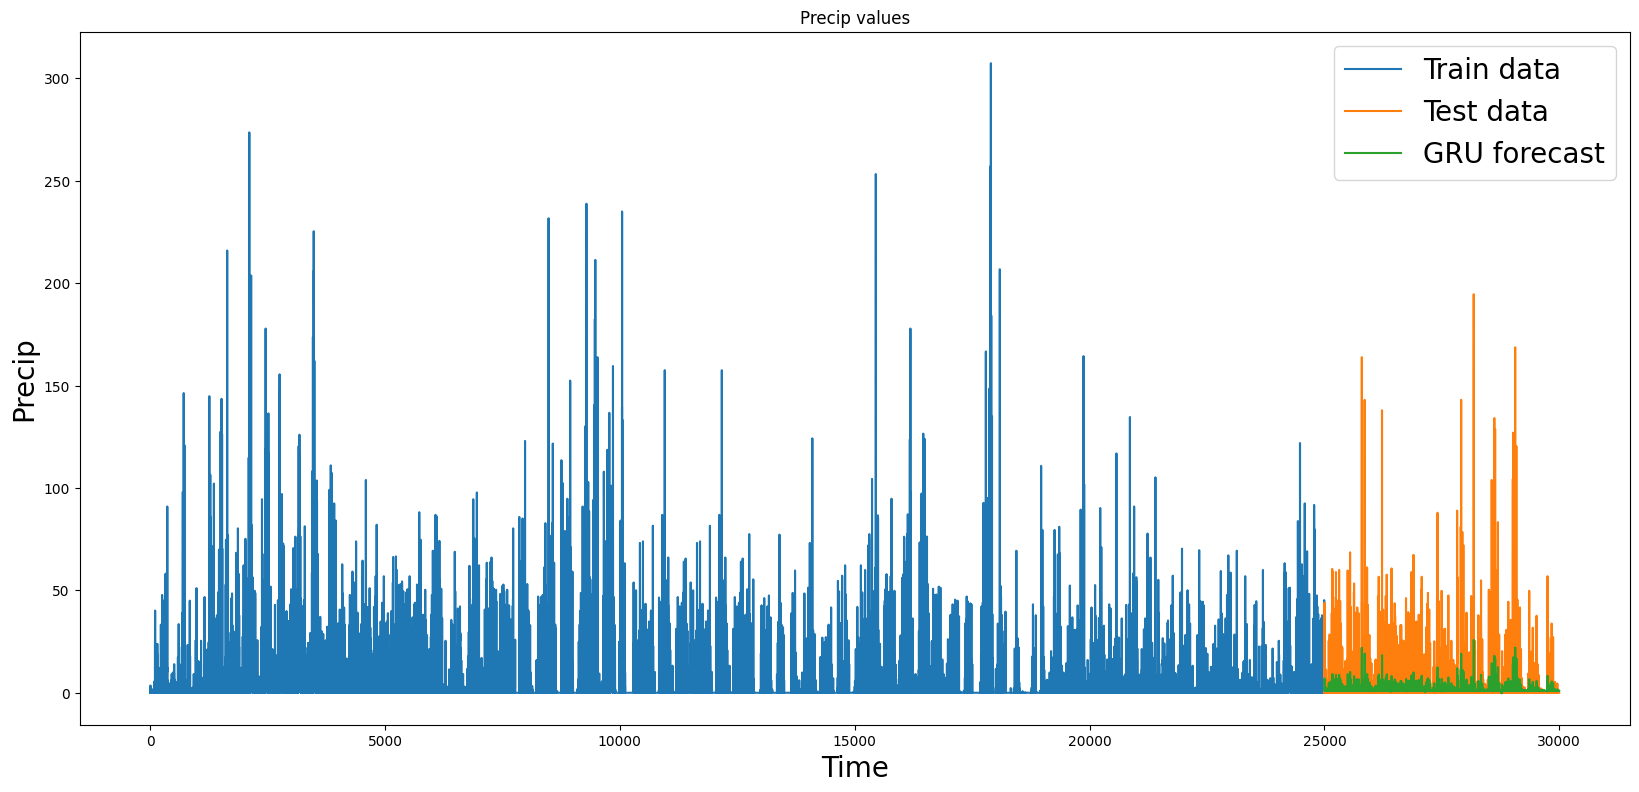

GRU Metrics Precip:
RMSE: 11.668072518973366
MSE: 136.14391630802146
SMAPE: 0.415
MAE: 4.329030503437768
R^2: 0.0092893130100139


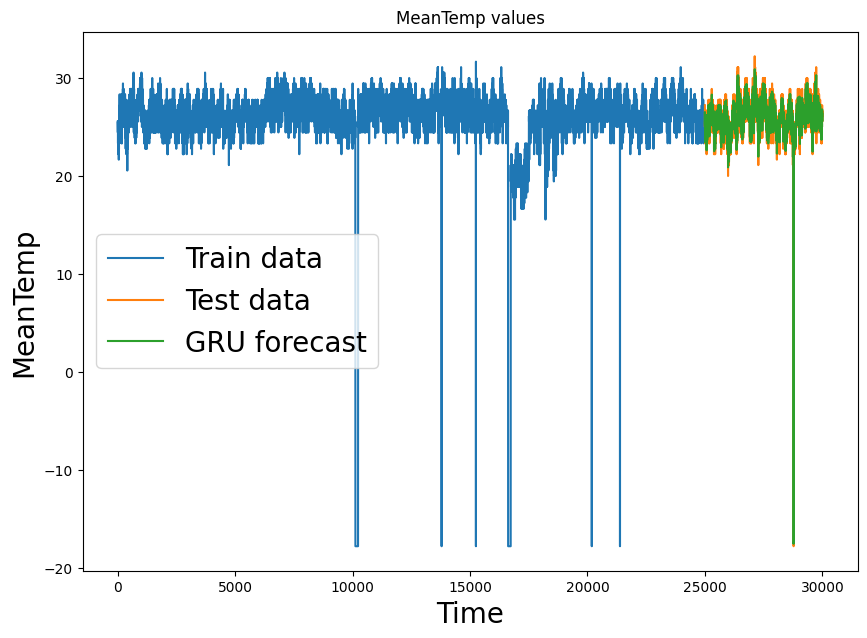

GRU Metrics MeanTemp:
RMSE: 1.2219017548987894
MSE: 1.4930438986247412
SMAPE: 0.007
MAE: 0.708991618286052
R^2: 0.7285247926894636


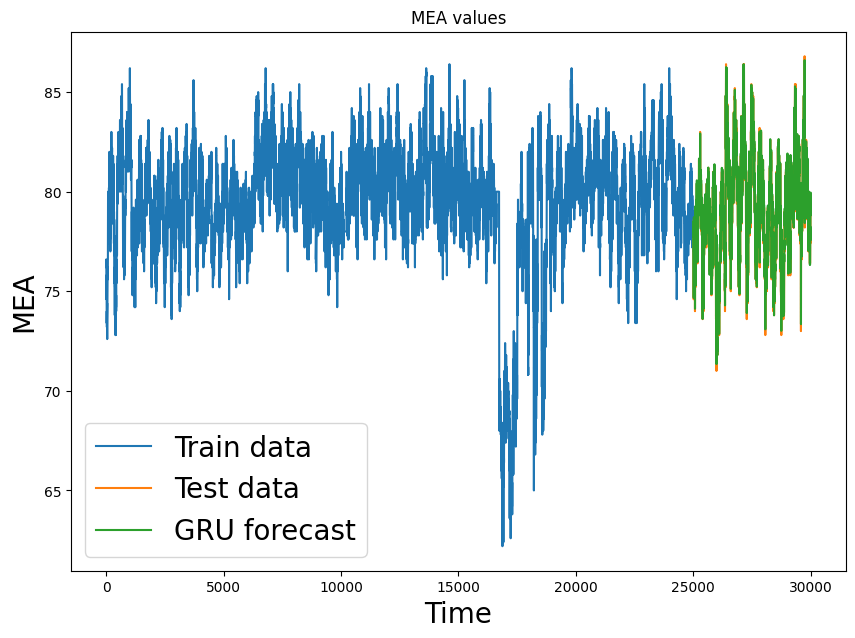

GRU Metrics MEA:
RMSE: 0.42064045890012364
MSE: 0.1769383956637066
SMAPE: 0.001
MAE: 0.32141153747558593
R^2: 0.9717110146026283


In [88]:
fig = plt.figure(figsize=(20, 9))
dur = len(y_pred)
size = int(len(x_train))

columns = ['Precip', 'MeanTemp', 'MEA']

for k in range(len(columns)):
    y_test_col = y_test[:, k]
    y_prew_col = y_pred[:, k]

    plt.plot([i for i in range(0, size)], y_train[:, k], label='Train data')
    plt.plot([i for i in range(size - 1, size - 1 + dur)], y_test_col, label='Test data')
    plt.plot([i for i in range(size - 1, size - 1 + dur)], y_prew_col, label='GRU forecast')
    plt.legend(fontsize="20")
    plt.title(f'{columns[k]} values')
    plt.ylabel(f'{columns[k]}', fontsize="20")
    plt.xlabel('Time', fontsize="20")
    plt.show()

    def smape_score(y_true, y_pred):
        return round(np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true)) + np.abs(y_pred)) / 2), 3)

    print(f"GRU Metrics {columns[k]}:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test_col, y_prew_col)))
    print("MSE:", mean_squared_error(y_test_col, y_prew_col))
    print("SMAPE:", smape_score(y_test_col, y_prew_col))
    print("MAE:", mean_absolute_error(y_test_col, y_prew_col))
    print("R^2:", r2_score(y_test_col, y_prew_col))

В целом показала такой же результат, как и LSTM. Только немного лучше)

**TCN**



TCN (Temporal Convolutional Network) - это тип нейронной сети, предназначенный для работы с последовательными данных, такими как временные ряды. Эта архитектура основана на использовании сверточных слоев для извлечения признаков из последовательных данных.

Подготовим данные.


In [89]:
df_tcn = pd.DataFrame(data)
df_tcn['Precip'] = data['Precip']
df_tcn['MeanTemp'] = data['MeanTemp']
df_tcn['MEA'] = data['MEA']

lookback_window = 20

df_tcn = df_tcn.values

x, y = [], []
for i in range(lookback_window, len(df_tcn)):
    x.append(df_tcn[i - lookback_window:i])
    y.append(df_tcn[i])
x = np.array(x)
y = np.array(y)

In [90]:


x_train = x[0:25000]
y_train = y[0:25000]
x_test = x[25000:30000]
y_test = y[25000:30000]



In [92]:
from tcn import TCN


i = Input(shape=(lookback_window, 3))
m = TCN()(i)
m = Dense(3, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()
model.compile('adam', 'mae')



<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 3)]           0         
                                                                 
 tcn (TCN)                   (None, 64)                136768    
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 136963 (535.01 KB)
Trainable params: 136963 (535.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
pip install keras-tcn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/keras_tcn-3.5.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/tensorflow_addons-0.23.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/typeguard-2.13.3.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [94]:


model.fit(x_train, y_train, epochs=70, verbose=0)



In [95]:
y_pred = model.predict(x_test)

157/157 [==============================] - 2s 11ms/step


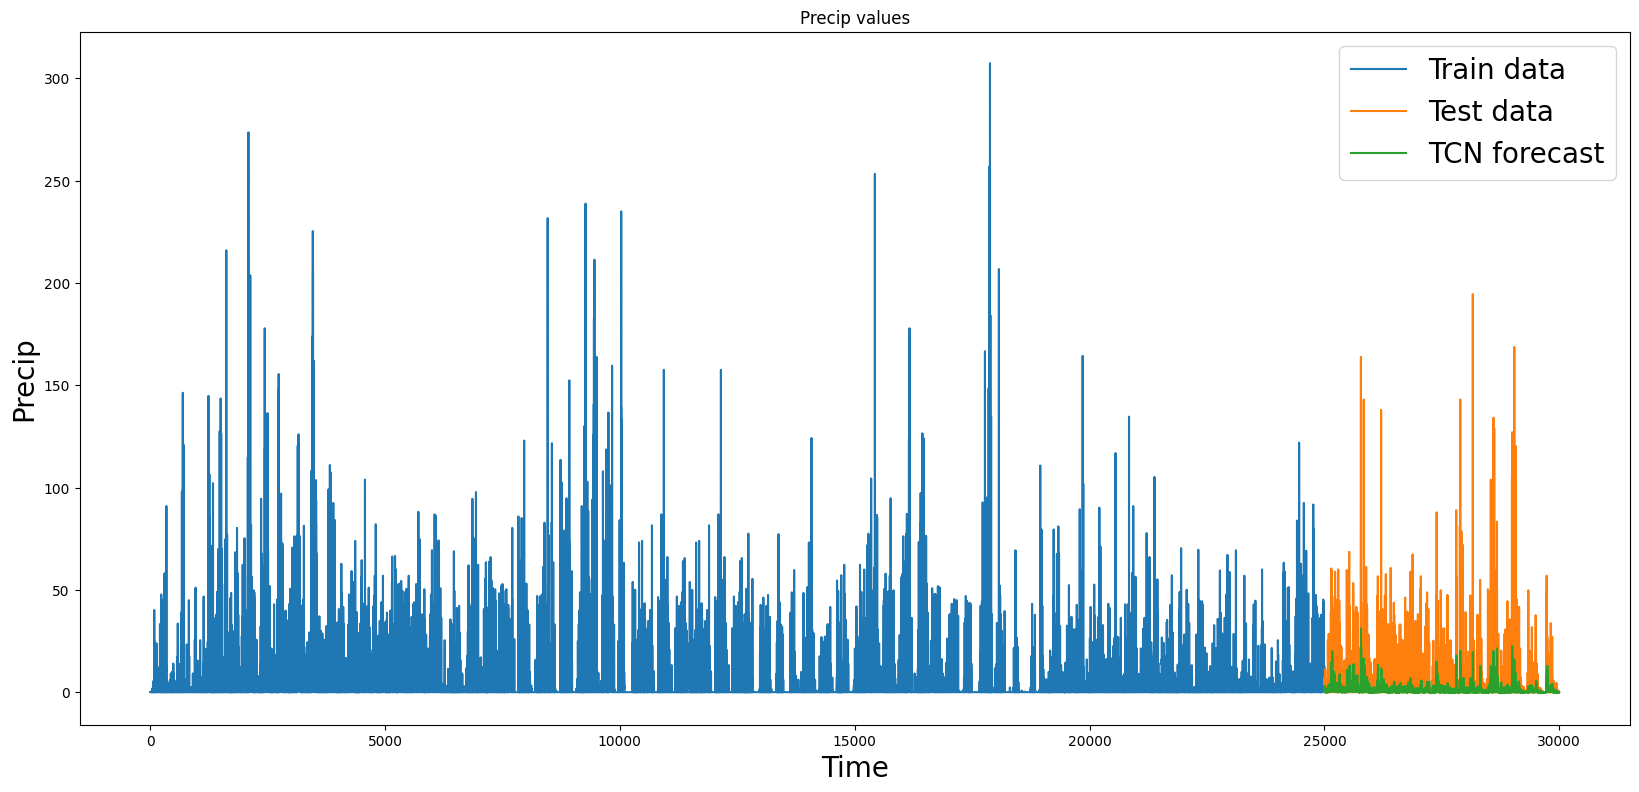

TCN Metrics Precip:
RMSE: 11.700468748646792
MSE: 136.90096893806023
SMAPE: 0.44
MAE: 3.9798233421457763
R^2: 0.000836354878133827


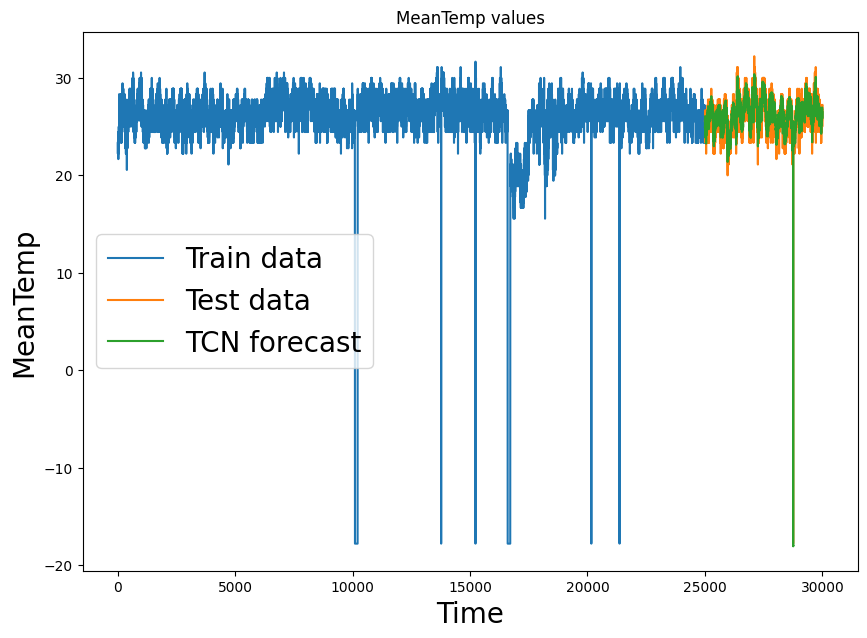

TCN Metrics MeanTemp:
RMSE: 1.2085629129174749
MSE: 1.4606243144795719
SMAPE: 0.007
MAE: 0.6739198530923469
R^2: 0.7339834916647152


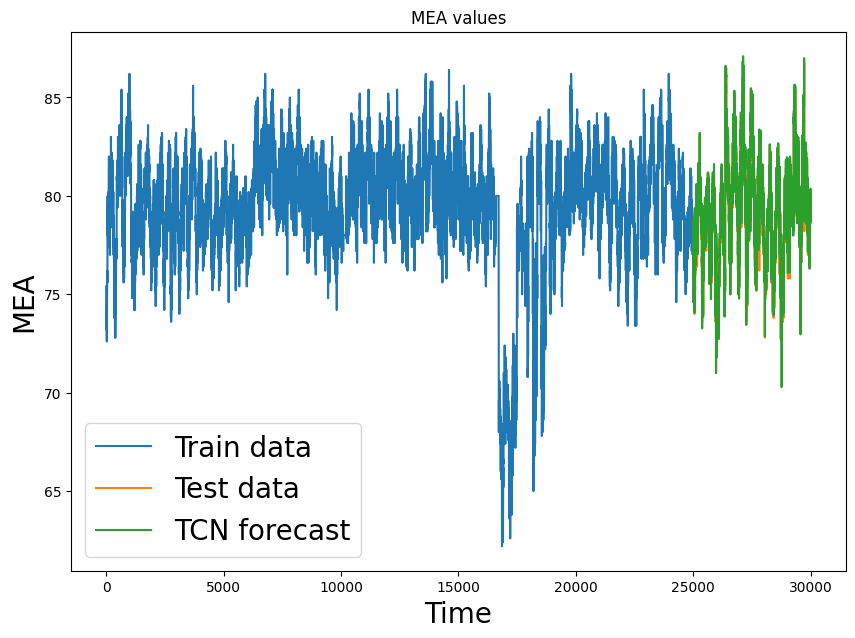

TCN Metrics MEA:
RMSE: 0.3671011750084009
MSE: 0.13476327269254856
SMAPE: 0.001
MAE: 0.26974669281005853
R^2: 0.9783596597783317


In [96]:


fig = plt.figure(figsize=(20, 9))
dur = len(y_pred)
size = int(len(x_train))

columns = ['Precip', 'MeanTemp', 'MEA']

for k in range(len(columns)):
    y_test_col = y_test[:, k]
    y_prew_col = y_pred[:, k]

    plt.plot([i for i in range(0, size)], y_train[:, k], label='Train data')
    plt.plot([i for i in range(size - 1, size - 1 + dur)], y_test_col, label='Test data')
    plt.plot([i for i in range(size - 1, size - 1 + dur)], y_prew_col, label='TCN forecast')
    plt.legend(fontsize="20")
    plt.title(f'{columns[k]} values')
    plt.ylabel(f'{columns[k]}', fontsize="20")
    plt.xlabel('Time', fontsize="20")
    plt.show()

    def smape_score(y_true, y_pred):
        return round(np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true)) + np.abs(y_pred)) / 2), 3)

    print(f"TCN Metrics {columns[k]}:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test_col, y_prew_col)))
    print("MSE:", mean_squared_error(y_test_col, y_prew_col))
    print("SMAPE:", smape_score(y_test_col, y_prew_col))
    print("MAE:", mean_absolute_error(y_test_col, y_prew_col))
    print("R^2:", r2_score(y_test_col, y_prew_col))



Впринципе результат такой же как на других. Лучший результат на GRU. Только вот еще TCN 40 мин обучалась)

***Итог:***

Из моего исследования следует, что среди классических моделей наилучшие результаты продемонстрировала VAR. Эта модель быстро подбирала оптимальные параметры для обучения и обучалась с высокой скоростью, обеспечивая качественные прогнозы. Что касается VARMAX, плохие результаты могли быть обусловлены неправильным подбором параметров. Я предположил, что параметры из VAR можно было бы интерпретировать на VARMA, но обучение заняло бы слишком много времени, и результаты могли бы быть неудовлетворительными.

При анализе нейронных сетей, я отметил, что модель GRU предпочтительнее благодаря своей простоте настройки и обучения. Также я обратил внимание на то, что модель TCN показала отличные результаты на неотмасштабированных данных, что свидетельствует о ее высокой эффективности.

В итоге, мои исследования показали, что нейронные сети превзошли классические алгоритмы прогнозирования благодаря их способности работать с данными без необходимости предварительной подготовки, дифференциации рядов для достижения стационарности и обеспечения отличного качества прогнозов без искажения предсказанных данных. Это подчеркивает важность выбора подходящей модели в зависимости от особенностей данных и требуемого качества прогнозов.

Так же я задался вопросом почему предсказания на цельсиях хуже чем на фаренгейтах. Как я думаю ,после линейного преобразования корреляция становится меньше - и как следствие - моедль по ней лучше прогнозирует значение.